# Sentiment Analysis on App Reviews
## Internship Project
This project focuses on analyzing user sentiment in app reviews using Natural Language Processing (NLP) techniques.

## 1. Data Loading & Exploration

In [7]:
# pip install wordcloud --break-system-packages
# !pip install nltk --break-system-packages
# if needed

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Load datasets
df = pd.read_csv('apps.csv')
df1 = pd.read_csv('user_reviews.csv')

# Display first few rows
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## 2. Exploratory Data Analysis (EDA)

/tmp/ipykernel_49494/2032526374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1['Sentiment'], palette='coolwarm')


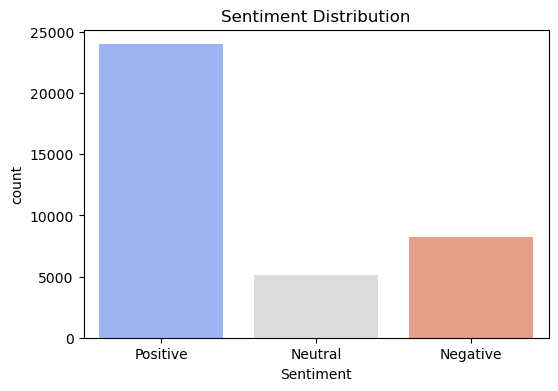

In [9]:
# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df1['Sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

## 3. Text Preprocessing

In [10]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply cleaning function
df1['Cleaned_Review'] = df1['Translated_Review'].apply(clean_text)

[nltk_data] Downloading package stopwords to /home/kali/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 4. Sentiment Classification using Naïve Bayes

In [11]:
# Convert sentiment labels to numeric
df1.dropna(subset=['Sentiment'], inplace=True)
df1['Sentiment'] = df1['Sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

# Vectorize text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df1['Cleaned_Review'])
y = df1['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

              precision    recall  f1-score   support

          -1       0.95      0.19      0.32      1662
           0       0.98      0.04      0.08      1000
           1       0.68      1.00      0.81      4825

    accuracy                           0.69      7487
   macro avg       0.87      0.41      0.40      7487
weighted avg       0.78      0.69      0.60      7487

Accuracy: 69.12%


## 5. Data Visualization & Word Clouds

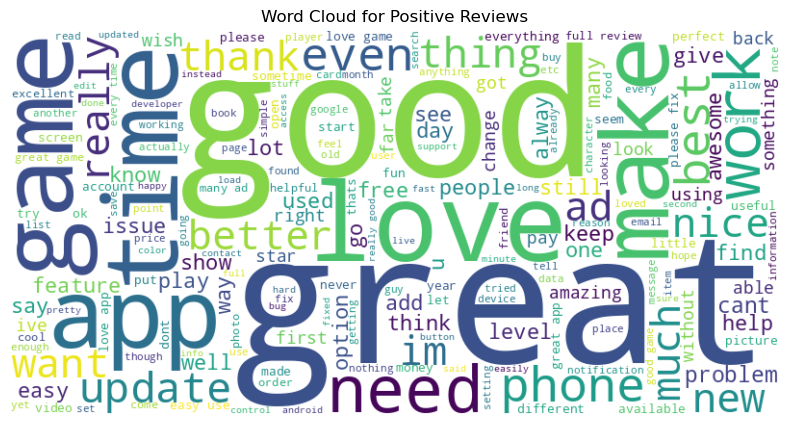

In [12]:
# Word cloud for positive reviews
positive_reviews = ' '.join(df1[df1['Sentiment'] == 1]['Cleaned_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

## 6. Insights & Business Impact
- **Identify customer pain points** from negative reviews to improve apps.
- **Enhance user engagement** by addressing common concerns in reviews.
- **Boost app ratings & downloads** by responding to user feedback effectively.
- **Improve customer service** by tracking sentiment trends over time.